# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-23 | 1.1 | Andre Buser | Checked spelling. Updated binning approach (quantiles as integers, no labels).
- 2022-01-15 | 1.0 | Andre Buser | Initial version.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [X] #TODO: **Complete** Data Science Ethics Checklist

## Purpose

The objective of this **stage two** notebook is to clean and prepare the **GDP** dataset for the EDA phase.

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [**NA**] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [**NA**] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [**NA**] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII), for example, through anonymization or not collecting information that isn't relevant for analysis?
 - [**NA**] **A.4 Downstream bias mitigation**: Have we considered ways to test downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [**NA**] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [**NA**] **B.2 Right to be forgotten**: Do we have a mechanism for individuals to request their personal information be removed?
 - [**NA**] **B.3 Data retention plan**: Is there a schedule to delete the data after it is no longer needed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*

# Setup Environment

## Install Modules

List !pip install commands for modules which are not part of the Google Colabs standard environment. For local environment, please use the provided installation files and environments.

In [34]:
#!pip install colorama # colorize output text
#!pip install missingno # for analyzing missing values
#!pip install scikit-learn

# document module versions
!pip install watermark

# required to use pickle files, protocol 2
!pip install pandas --upgrade

# to work with xls files
!pip install xlrd

## Import Modules

In [35]:
# Base libraries
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Helper libraries
import warnings
warnings.filterwarnings('ignore')

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Define Parameters

In [36]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Paths: Google Colabs Setup
    PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
    PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
    PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
    PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
    PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
    PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"
    
except:
    # Paths: Local Setup
    PATH_EXT = "../data/external/"
    PATH_RAW = "../data/raw/"
    PATH_INT = "../data/interim/"
    PATH_PRO = "../data/processed/"
    PATH_REP = "../reports/"
    PATH_FIGS = "../reports/figures/"

# Load Data

In [37]:
FILENAME = "API_NY.GDP.MKTP.CD_DS2_en_excel_v2_3158925.xls"
data_path = os.path.join(PATH_EXT, FILENAME)
df = pd.read_excel(data_path, sheet_name="Data", skiprows=3)


In [38]:
df.head()
df.info()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,2.919650e+10,3.021907e+10,3.292707e+10,3.780176e+10,4.037711e+10,4.454432e+10,4.837496e+10,6.307931e+10,7.836992e+10,8.356248e+10,8.333700e+10,9.513344e+10,1.065079e+11,1.246876e+11,1.567508e+11,1.606220e+11,1.549046e+11,1.600005e+11,1.462440e+11,1.306382e+11,1.472488e+11,1.800129e+11,1.892908e+11,1.948393e+11,2.126590e+11,2.210995e+11,2.205538e+11,2.209496e+11,2.250995e+11,2.531362e+11,2.525501e+11,2.655492e+11,2.503778e+11,2.470674e+11,2.683151e+11,2.421055e+11,2.476568e+11,3.267442e+11,4.058605e+11,4.717427e+11,5.335335e+11,6.131644e+11,6.680371e+11,6.709865e+11,8.057947e+11,8.986047e+11,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,1.583747e+10,1.443065e+10,1.488470e+10,1.688703e+10,2.351148e+10,2.083891e+10,2.527234e+10,3.128296e+10,4.422741e+10,5.145977e+10,6.214756e+10,6.533410e+10,7.122053e+10,8.865431e+10,1.120641e+11,2.110652e+11,1.872184e+11,1.381556e+11,1.142961e+11,1.165413e+11,1.075290e+11,1.103540e+11,1.089753e+11,1.017985e+11,1.218377e+11,1.174914e+11,1.183168e+11,9.718677e+10,8.569306e+10,1.074030e+11,1.190436e+11,1.199833e+11,1.226213e+11,1.301987e+11,1.341502e+11,1.418625e+11,1.705319e+11,1.973842e+11,2.458565e+11,3.021108e+11,3.843363e+11,4.518661e+11,5.530312e+11,4.925458e+11,5.802173e+11,6.584282e+11,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.934074e+09,5.553824e+09,5.553824e+09,5.787824e+09,6.135166e+09,7.558613e+09,7.076794e+09,8.089279e+09,8.775116e+09,1.020792e+10,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            133 non-null    float64
 6   1962            136 non-null    float64
 7   1963            136 non-null    float64
 8   1964            136 non-null    float64
 9   1965            147 non-null    float64
 10  1966            150 non-null    float64
 11  1967            153 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            167 non-null    float64
 15  1971            170 non-null    float64
 16  1972            170 non-null    float64
 17  1973            170 non-null    flo

In [39]:
FILENAME = "country_master_list.csv"
data_path = os.path.join(PATH_INT, FILENAME)
cml_df = pd.read_csv(data_path)

In [40]:
cml_df.head()
cml_df.info()

,country,country_label
0,AUSTRIA,0
1,BELGIUM,1
2,BULGARIA,2
3,CROATIA,3
4,CYPRUS,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        31 non-null     object
 1   country_label  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


# Clean Data

**Checklist:**
**General**
- [X] Lowercase the column names of the dataframe(s) to make references within the notebook(s) more straightforward and consistent
- [X] Check for consistencies (naming, writing) for all the categorical features
- [X] Create “mapping_key” column based on country+year; used to join the various datasets
- [X] Drop unused columns: keep the following years: [2021, 2022, 2019, 2020, 2018]
- [X] Check for missing values

**Dataset-specific:**
- [X] Calculate cpi score for 2021 based on average
- [X] Create mapping_key column: country+year
- [X] Create category column for cpi score
- [X] Only keep the countries based on the GDPR-fine dataset (as the main dataset), drop the unused/non-relevant countries
- [X] Save the result in SQLite DB-file


## Lowercase the column names

In [41]:
df.columns = df.columns.str.lower()
df

,country name,country code,indicator name,indicator code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,2.919650e+10,3.021907e+10,3.292707e+10,3.780176e+10,4.037711e+10,4.454432e+10,4.837496e+10,6.307931e+10,7.836992e+10,8.356248e+10,8.333700e+10,9.513344e+10,1.065079e+11,1.246876e+11,1.567508e+11,1.606220e+11,1.549046e+11,1.600005e+11,1.462440e+11,1.306382e+11,1.472488e+11,1.800129e+11,1.892908e+11,1.948393e+11,2.126590e+11,2.210995e+11,2.205538e+11,2.209496e+11,2.250995e+11,2.531362e+11,2.525501e+11,2.655492e+11,2.503778e+11,2.470674e+11,2.683151e+11,2.421055e+11,2.476568e+11,3.267442e+11,4.058605e+11,4.717427e+11,5.335335e+11,6.131644e+11,6.680371e+11,6.709865e+11,8.057947e+11,8.986047e+11,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,1.583747e+10,1.443065e+10,1.488470e+10,1.688703e+10,2.351148e+10,2.083891e+10,2.527234e+10,3.128296e+10,4.422741e+10,5.145977e+10,6.214756e+10,6.533410e+10,7.122053e+10,8.865431e+10,1.120641e+11,2.110652e+11,1.872184e+11,1.381556e+11,1.142961e+11,1.165413e+11,1.075290e+11,1.103540e+11,1.089753e+11,1.017985e+11,1.218377e+11,1.174914e+11,1.183168e+11,9.718677e+10,8.569306e+10,1.074030e+11,1.190436e+11,1.199833e+11,1.226213e+11,1.301987e+11,1.341502e+11,1.418625e+11,1.705319e+11,1.973842e+11,2.458565e+11,3.021108e+11,3.843363e+11,4.518661e+11,5.530312e+11,4.925458e+11,5.802173e+11,6.584282e+11,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.934074e+09,5.553824e+09,5.553824e+09,5.787824e+09,6.135166e+09,7.558613e+09,7.076794e+09,8.089279e+09,8.775116e+09,1.020792e+10,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10
...,...,...,...,...,...,...,...,...,.

## Extract relevant features and calculate expected GDP score for 2021

In [42]:
df_gdp = pd.DataFrame()
df_gdp = df.loc[:, df.columns.str.contains('20')]
df_gdp = df_gdp[['2012','2013','2014','2015','2016','2017','2018','2019','2020']]
df_gdp

,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11
2,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11
4,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10
...,...,...,...,...,...,...,...,...,...
261,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.953156e+09,7.611402e+09
262,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.093383e+10,2.673614e+10,2.348627e+10,NaN,NaN
263,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,3.019236e+11
264,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631164e+10,2.330869e+10,1.932005e+10


In [43]:
# Calculate CPI score for 2021 based on average values over the years
df_gdp['2021'] = df_gdp.mean(axis=1).round(0)
df_gdp

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,2.899214e+09
1,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11,9.321706e+11
2,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,1.947716e+10
3,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,7.571620e+11
4,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,1.114437e+11
...,...,...,...,...,...,...,...,...,...,...
261,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.953156e+09,7.611402e+09,7.209623e+09
262,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.093383e+10,2.673614e+10,2.348627e+10,NaN,NaN,3.466379e+10
263,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,3.019236e+11,3.443603e+11
264,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631164e+10,2.330869e+10,1.932005e+10,2.418944e+10


In [44]:
df_country = pd.DataFrame()
df_country['country'] = df['country name']

In [45]:
#df = pd.concat([df_country,df_cpi, df_rank], axis=1)
df = pd.concat([df_country,df_gdp], axis=1)
df

,country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,2.899214e+09
1,Africa Eastern and Southern,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11,9.321706e+11
2,Afghanistan,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,1.947716e+10
3,Africa Western and Central,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,7.571620e+11
4,Angola,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,1.114437e+11
...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.953156e+09,7.611402e+09,7.209623e+09
262,"Yemen, Rep.",3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.093383e+10,2.673614e+10,2.348627e+10,NaN,NaN,3.466379e+10
263,South Africa,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,3.019236e+11,3.443603e+11
264,Zambia,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631164e+10,2.330869e+10,1.932005e+10,2.418944e+10


In [46]:
df_gdp = pd.melt(df, id_vars=['country'], value_vars=['2021','2020','2019', '2018'], var_name='year', value_name='gdp')
df_gdp.sort_values(['country','year'], inplace=True)
df_gdp.reset_index(drop=True, inplace=True)
df_gdp

,country,year,gdp
0,Afghanistan,2018,1.835388e+10
1,Afghanistan,2019,1.929110e+10
2,Afghanistan,2020,1.980707e+10
3,Afghanistan,2021,1.947716e+10
4,Africa Eastern and Southern,2018,9.866107e+11
...,...,...,...
1059,Zambia,2021,2.418944e+10
1060,Zimbabwe,2018,1.952362e+10
1061,Zimbabwe,2019,1.693243e+10
1062,Zimbabwe,2020,1.676851e+10


In [47]:
# Binning
df_gdp['gdp'] = df_gdp['gdp'].round(0)
df_gdp['gdp_cat'] = df_gdp['gdp'].round(-10)

df_gdp['gdp_cat2'] = pd.qcut(df_gdp['gdp'], q=10, labels=False, precision=0) # new binning approach, maybe the correlation coeff. improves
df_gdp['gdp_cat2'] = df_gdp['gdp_cat2'].astype(float)
df_gdp

,country,year,gdp,gdp_cat,gdp_cat2
0,Afghanistan,2018,1.835388e+10,2.000000e+10,3.0
1,Afghanistan,2019,1.929110e+10,2.000000e+10,3.0
2,Afghanistan,2020,1.980707e+10,2.000000e+10,3.0
3,Afghanistan,2021,1.947716e+10,2.000000e+10,3.0
4,Africa Eastern and Southern,2018,9.866107e+11,9.900000e+11,7.0
...,...,...,...,...,...
1059,Zambia,2021,2.418944e+10,2.000000e+10,3.0
1060,Zimbabwe,2018,1.952362e+10,2.000000e+10,3.0
1061,Zimbabwe,2019,1.693243e+10,2.000000e+10,3.0
1062,Zimbabwe,2020,1.676851e+10,2.000000e+10,3.0


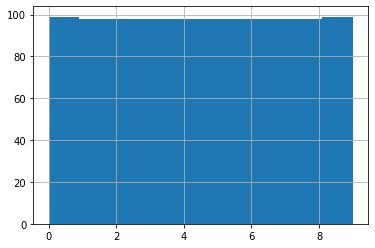

In [48]:
# Checking the distribution of the quantiles
df_gdp['gdp_cat2'].hist();

In [49]:
df = df_gdp.copy()

## Check for consistencies (naming, writing) and apply required cleaning and transformation steps

### country column

In [50]:
df['country'] = df['country'].str.upper()
df['country'].unique().tolist()
print('Result:\n - Align country names with country master list, .e.g. UK with UNITED KINGDOM.\n - Uppercase country names')

['AFGHANISTAN',
 'AFRICA EASTERN AND SOUTHERN',
 'AFRICA WESTERN AND CENTRAL',
 'ALBANIA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDORRA',
 'ANGOLA',
 'ANTIGUA AND BARBUDA',
 'ARAB WORLD',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS, THE',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRITISH VIRGIN ISLANDS',
 'BRUNEI DARUSSALAM',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CABO VERDE',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CARIBBEAN SMALL STATES',
 'CAYMAN ISLANDS',
 'CENTRAL AFRICAN REPUBLIC',
 'CENTRAL EUROPE AND THE BALTICS',
 'CHAD',
 'CHANNEL ISLANDS',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO, DEM. REP.',
 'CONGO, REP.',
 'COSTA RICA',
 "COTE D'IVOIRE",
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EARLY-DEMOGRAPHIC DIVIDEND',

Result:
 - Align country names with country master list, .e.g. UK with UNITED KINGDOM.
 - Uppercase country names


In [51]:
# Create country lists for comparision
cml_list = cml_df['country'].unique().tolist()
df_country_list = set(df['country'].unique().tolist())

In [52]:
# Check if master country can be found in the population country list. 
# If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)

Check the writing of the following countries:
SLOVAKIA NOT found in population country list.
THE NETHERLANDS NOT found in population country list.
Count: 2


In [53]:
# Rename/replace country names in population dataframe
df.replace('SLOVAK REPUBLIC','SLOVAKIA', inplace=True)
df.replace('NETHERLANDS','THE NETHERLANDS', inplace=True)


In [54]:
# Update country lists for comparision
df_country_list = set(df['country'].unique().tolist())

# Checking if master country can be found in the population country list. If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)
assert count == 0

Check the writing of the following countries:
Count: 0


In [55]:
# Remove unwanted countries
cml_list = cml_df['country'].unique().tolist()

# Only keep countries which are listed in country master list (cml_list)
df = df[df['country'].isin(cml_list)]

In [56]:
df

,country,year,gdp,gdp_cat,gdp_cat2
56,AUSTRIA,2018,4.548726e+11,4.500000e+11,7.0
57,AUSTRIA,2019,4.450754e+11,4.500000e+11,7.0
58,AUSTRIA,2020,4.309474e+11,4.300000e+11,7.0
59,AUSTRIA,2021,4.228866e+11,4.200000e+11,7.0
84,BELGIUM,2018,5.434107e+11,5.400000e+11,7.0
...,...,...,...,...,...
939,SWEDEN,2021,5.459406e+11,5.500000e+11,7.0
1008,UNITED KINGDOM,2018,2.857317e+12,2.860000e+12,8.0
1009,UNITED KINGDOM,2019,2.830814e+12,2.830000e+12,8.0
1010,UNITED KINGDOM,2020,2.707744e+12,2.710000e+12,8.0


### year column

In [57]:
sorted(df['year'].unique().tolist())
print('Result: All good.')

['2018', '2019', '2020', '2021']

Result: All good.


## Create mapping_key column

In [58]:
df['mapping_key'] = df['country'].str.strip()+"-"+df['year'].astype(str)
df['mapping_key'] = df['mapping_key'].str.replace(" ","")
df

,country,year,gdp,gdp_cat,gdp_cat2,mapping_key
56,AUSTRIA,2018,4.548726e+11,4.500000e+11,7.0,AUSTRIA-2018
57,AUSTRIA,2019,4.450754e+11,4.500000e+11,7.0,AUSTRIA-2019
58,AUSTRIA,2020,4.309474e+11,4.300000e+11,7.0,AUSTRIA-2020
59,AUSTRIA,2021,4.228866e+11,4.200000e+11,7.0,AUSTRIA-2021
84,BELGIUM,2018,5.434107e+11,5.400000e+11,7.0,BELGIUM-2018
...,...,...,...,...,...,...
939,SWEDEN,2021,5.459406e+11,5.500000e+11,7.0,SWEDEN-2021
1008,UNITED KINGDOM,2018,2.857317e+12,2.860000e+12,8.0,UNITEDKINGDOM-2018
1009,UNITED KINGDOM,2019,2.830814e+12,2.830000e+12,8.0,UNITEDKINGDOM-2019
1010,UNITED KINGDOM,2020,2.707744e+12,2.710000e+12,8.0,UNITEDKINGDOM-2020


## Add country labels

In [59]:
df = df.merge(cml_df, on='country')
df

,country,year,gdp,gdp_cat,gdp_cat2,mapping_key,country_label
0,AUSTRIA,2018,4.548726e+11,4.500000e+11,7.0,AUSTRIA-2018,0
1,AUSTRIA,2019,4.450754e+11,4.500000e+11,7.0,AUSTRIA-2019,0
2,AUSTRIA,2020,4.309474e+11,4.300000e+11,7.0,AUSTRIA-2020,0
3,AUSTRIA,2021,4.228866e+11,4.200000e+11,7.0,AUSTRIA-2021,0
4,BELGIUM,2018,5.434107e+11,5.400000e+11,7.0,BELGIUM-2018,1
...,...,...,...,...,...,...,...
119,SWEDEN,2021,5.459406e+11,5.500000e+11,7.0,SWEDEN-2021,28
120,UNITED KINGDOM,2018,2.857317e+12,2.860000e+12,8.0,UNITEDKINGDOM-2018,30
121,UNITED KINGDOM,2019,2.830814e+12,2.830000e+12,8.0,UNITEDKINGDOM-2019,30
122,UNITED KINGDOM,2020,2.707744e+12,2.710000e+12,8.0,UNITEDKINGDOM-2020,30


# Save Cleaned DataFrame

In [67]:
# Reordering columns
df = df[['mapping_key','country','year','gdp', 'gdp_cat', 'gdp_cat2', 'country_label']]
df

,mapping_key,country,year,gdp,gdp_cat,gdp_cat2,country_label
0,AUSTRIA-2018,AUSTRIA,2018,4.548726e+11,4.500000e+11,7.0,0
1,AUSTRIA-2019,AUSTRIA,2019,4.450754e+11,4.500000e+11,7.0,0
2,AUSTRIA-2020,AUSTRIA,2020,4.309474e+11,4.300000e+11,7.0,0
3,AUSTRIA-2021,AUSTRIA,2021,4.228866e+11,4.200000e+11,7.0,0
4,BELGIUM-2018,BELGIUM,2018,5.434107e+11,5.400000e+11,7.0,1
...,...,...,...,...,...,...,...
119,SWEDEN-2021,SWEDEN,2021,5.459406e+11,5.500000e+11,7.0,28
120,UNITEDKINGDOM-2018,UNITED KINGDOM,2018,2.857317e+12,2.860000e+12,8.0,30
121,UNITEDKINGDOM-2019,UNITED KINGDOM,2019,2.830814e+12,2.830000e+12,8.0,30
122,UNITEDKINGDOM-2020,UNITED KINGDOM,2020,2.707744e+12,2.710000e+12,8.0,30


In [61]:
FILENAME = "cpi-CLEANED_p2.pkl"
data_path = os.path.join(PATH_INT, FILENAME)
#df.to_pickle(data_path, protocol=2)

In [62]:
# Saving cleaned dataset as csv to allow quick reviews
FILENAME = "gdp-CLEANED.csv"
data_path = os.path.join(PATH_INT, FILENAME)
df.to_csv(data_path, index=False)

In [63]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df.to_sql("GDP", con, index=False, if_exists="replace")
con.close()

124

# Watermark

In [64]:
%watermark

Last updated: 2022-01-23T23:10:19.768366+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [65]:
%watermark --iversions

sqlite3   : 2.6.0
matplotlib: 3.5.0
pandas    : 1.4.0
seaborn   : 0.11.2
numpy     : 1.21.4
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]



-----
